# **11장 차원축소, 잠재공간, 오토인코더**
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 머신러닝 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML2nd
*  저작권 : 본 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### **LAB 11.**

In [1]:
# tf.keras를 임포트한다
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터는 keras의 데이터셋에 있으며, 학습용, 테스트 데이터로 구분
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = \
                                    fashion_mnist.load_data()
print(train_images.shape, test_images.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [2]:
def plot_images(nRow, nCol, img, cmap='gray'):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j], cmap = cmap)

In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers
enc_cnn = models.Sequential([
               layers.Conv2D(filters=16, kernel_size=3,
                             activation='elu', input_shape=(28,28,1)),
               layers.Conv2D(filters=16, kernel_size=3, activation='elu'),
               layers.Flatten(),
               layers.Dense(100, activation='elu')])
enc_cnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       921,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 924,180 (3.53 MB)

 Trainable params: 924,180 (3.53 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
dec_cnn = models.Sequential([
      layers.Dense(9216, input_shape=(100, ), activation='elu'),
      layers.Reshape(target_shape=(24,24,16)),
      layers.Conv2DTranspose(filters=16, kernel_size=3,activation='elu'),
      layers.Conv2DTranspose(filters=1, kernel_size=3,activation='elu')])
dec_cnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 9216)           │       930,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 26, 26, 16)     │         2,320 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 1)      │           145 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 933,281 (3.56 MB)

 Trainable params: 933,281 (3.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 1773.2590
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 691.6270
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 581.8123
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 530.5488
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 496.5770
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 472.8961
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 456.3877
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 442.0793
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 431.0926
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 421.1301
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 416.7064
Epoch 12/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 405.5299
Epoch 13/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 401.7477
Epoch 14/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 395.670

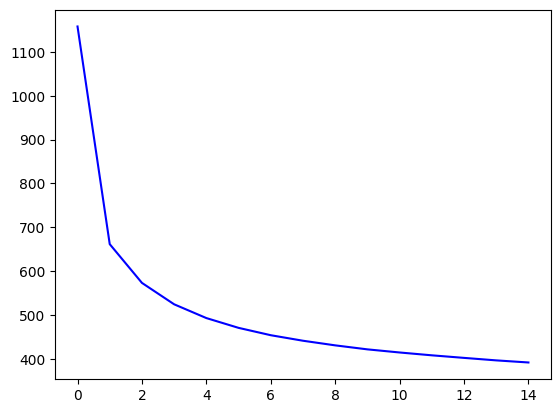

In [5]:
from tensorflow.keras.optimizers import RMSprop

AE_CNN = models.Sequential([enc_cnn, dec_cnn])
AE_CNN.compile(optimizer=RMSprop(learning_rate = 1e-3),
              loss='mse')
X_cnn = train_images.reshape(-1, 28, 28, 1)
history = AE_CNN.fit(X_cnn, X_cnn, epochs = 15)
plt.plot(history.history['loss'], 'b-')

<Figure size 640x480 with 0 Axes>

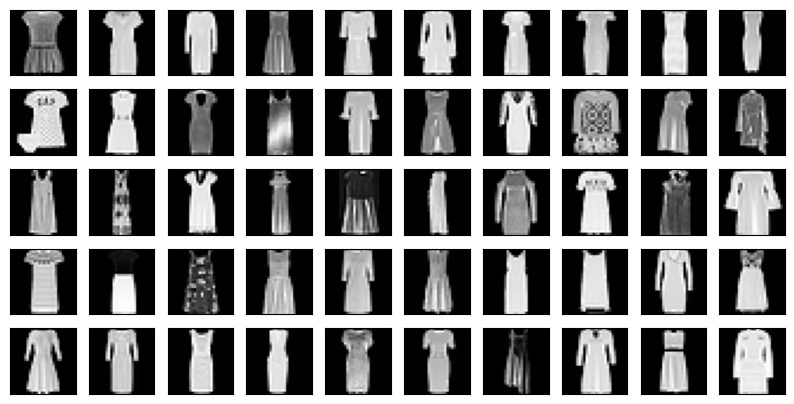

In [6]:
# 드레스만 인코딩하여 잠재표현을 얻자
dress_idx = train_labels == 3    # 드레스의 클래스 번호는 3
dress_array = train_images[dress_idx]
plot_images(5, 10, dress_array.reshape(-1, 28, 28))

(60000, 28, 28)
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<Figure size 640x480 with 0 Axes>

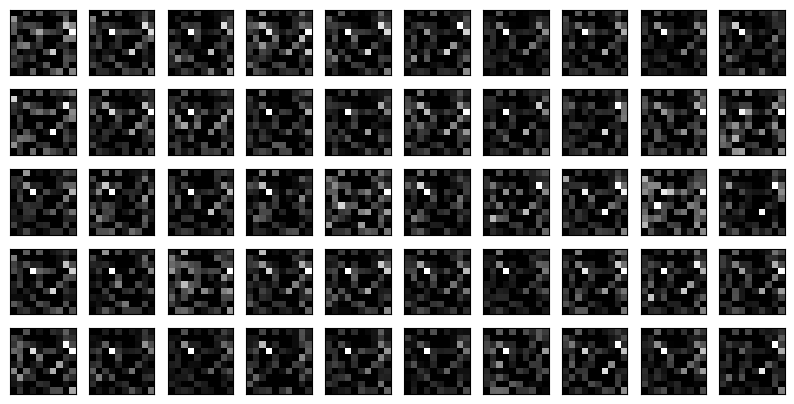

In [7]:
print(train_images.shape)
dress_array = dress_array.reshape(-1,28,28, 1)
dress_encoded = enc_cnn.predict(dress_array)
plot_images(5, 10, dress_encoded.reshape(-1, 10, 10))

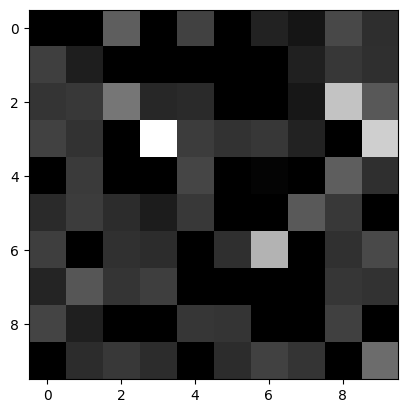

In [8]:
dress_latent = dress_encoded.mean(axis = 0)
plt.imshow(dress_latent.reshape(10,10), cmap='gray')

In [9]:
dress_latent_augmented = []
for _ in range(50):
    # 잠재 표현에 잡음 추가
    new_dress = dress_latent*(1+np.random.randn(100)*0.3)
    dress_latent_augmented.append(new_dress)  # 잡음 추가된 데이터를 리스트화
# 변형된 잠재 표현의 리스트를 넘파이 배열로 바꾼다.
dress_latent_augmented = np.array(dress_latent_augmented)

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_5
Received: inputs=('Tensor(shape=(32, 100))',)
  warnings.warn(msg)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_5
Received: inputs=('Tensor(shape=(None, 100))',)
  warnings.warn(msg)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


<Figure size 640x480 with 0 Axes>

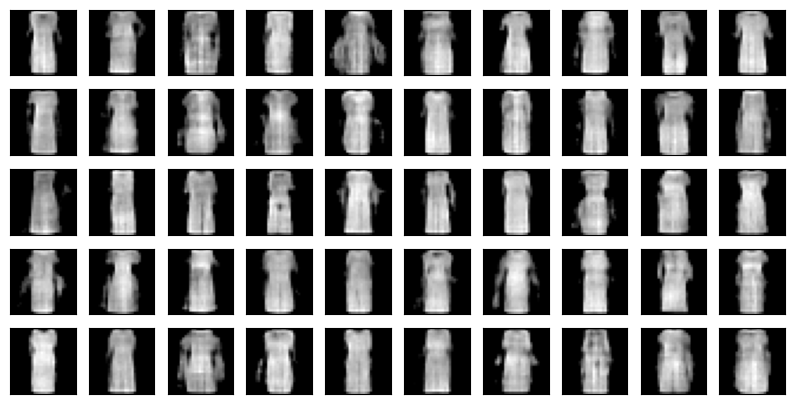

In [10]:
dress_generated = dec_cnn.predict([dress_latent_augmented])
plot_images(5, 10, dress_generated.reshape(-1, 28, 28))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


<Figure size 1200x500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

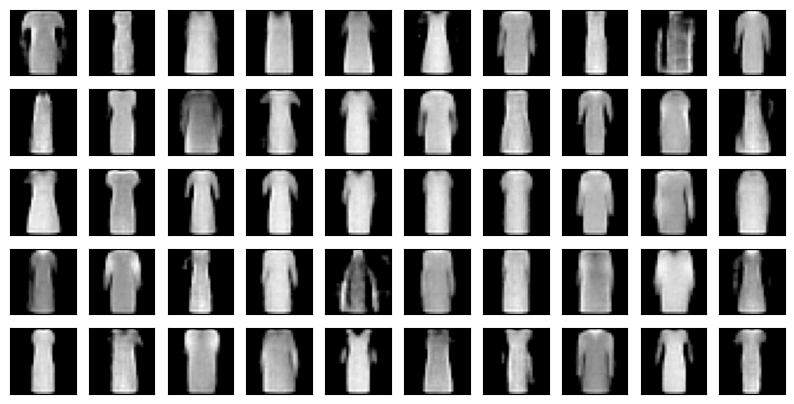

In [24]:
# 단순 랜덤 노이즈 대신, 실제 드레스 잠재 표현들 사이의 분산 방향을 이용!
dress_encoded_centered = dress_encoded - dress_latent  # 중심화
cov = np.cov(dress_encoded_centered.T) # 공분산 행렬
eigvals, eigvecs = np.linalg.eigh(cov) # 공분산의 고유치 분해 = 주성분 분석

dress_latent_augmented = []
for _ in range(50):
   # 공분산의 주성분 방향으로만 노이즈 추가: 실제 드레스의 변화를 고려한 변형
   n_axis = 10 # 사용할 주성분 개수
   noise = np.random.randn(n_axis) * np.sqrt(eigvals[-n_axis:])
   perturbation = eigvecs[:, -n_axis:] @ noise
   new_latent = dress_latent + perturbation
   dress_latent_augmented.append(new_latent)

dress_latent_augmented = np.array(dress_latent_augmented)
dress_generated_pca = dec_cnn.predict(dress_latent_augmented)

plt.figure(figsize=(12,5))
plt.suptitle("PCA-based perturbation (더 자연스러운 드레스 변형!)")
plot_images(5, 10, dress_generated_pca.reshape(-1, 28, 28))